In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Input
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [24]:
(x_train,y_train),(x_test,y_test)= boston_housing.load_data()

y_test.shape
x_train.shape
x_test.shape

(102, 13)

In [25]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = x_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = x_test[:, boston_features["Average Number of Rooms"]]

(404,)


In [51]:
model = Sequential()
model.add(Dense(units=8, input_shape=(1,)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 16        
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
 dense_12 (Dense)            (None, 4)                 28        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
Total params: 108 (432.00 Byte)
Trainable params: 108 (432.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")


In [54]:


history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)



Epoch 1/101
18/18 [==============================] - 0s 9ms/step - loss: 45.4346 - val_loss: 59.3847
Epoch 2/101
18/18 [==============================] - 0s 5ms/step - loss: 44.9407 - val_loss: 55.2364
Epoch 3/101
18/18 [==============================] - 0s 4ms/step - loss: 44.7095 - val_loss: 57.6842
Epoch 4/101
18/18 [==============================] - 0s 5ms/step - loss: 44.8044 - val_loss: 56.5200
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 43.8657 - val_loss: 64.8703
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 44.3843 - val_loss: 65.6901
Epoch 7/101
18/18 [==============================] - 0s 5ms/step - loss: 43.6335 - val_loss: 62.1778
Epoch 8/101
18/18 [==============================] - 0s 4ms/step - loss: 44.0123 - val_loss: 55.9002
Epoch 9/101
18/18 [==============================] - 0s 5ms/step - loss: 44.5326 - val_loss: 53.3504
Epoch 10/101
18/18 [==============================] - 0s 5ms/step - loss: 43.6396 - val_los

In [59]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

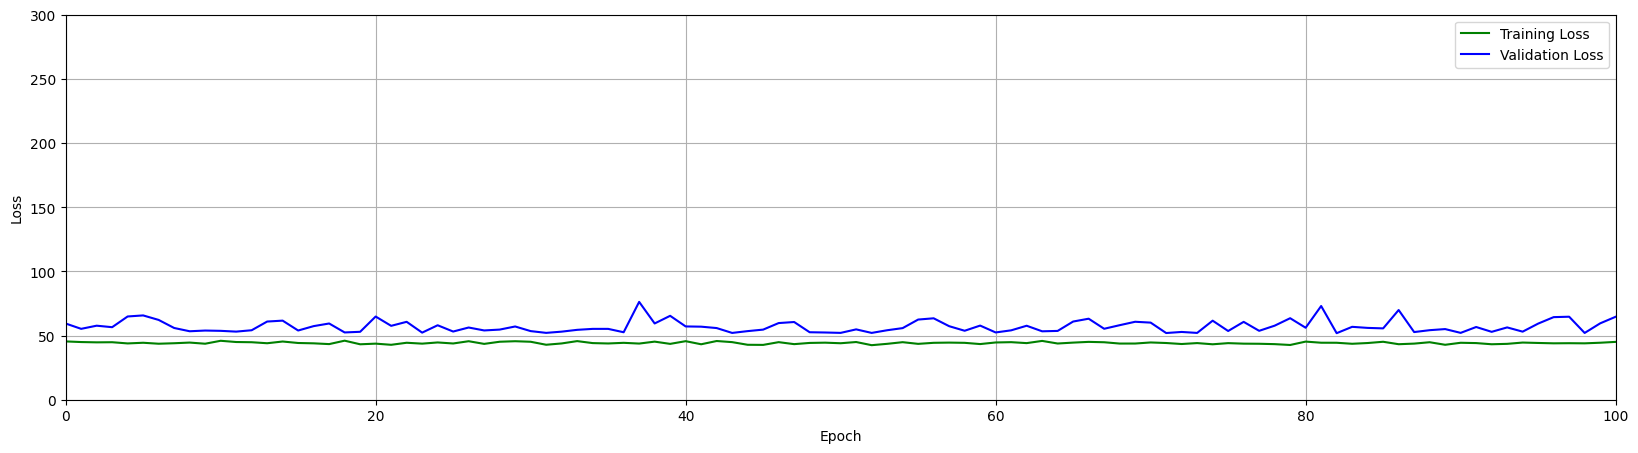

In [60]:
plot_loss(history)